In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Keeps first row of header and drops the other 2 header rows.
# Drops the blank rows and the total row since it is redundant.
# Fillna(0) and replace.({'**': 0}) replaced NaN and ** values with zeros.
Florida_data= pd.read_excel('Resources/16zp10fl.xls', sheetname='Sheet1', header=3)
Florida_data=Florida_data.drop(Florida_data.index[0:3])
Florida_data=Florida_data.rename(columns= {"ZIP\ncode [1]": "Zip Code"})
Florida_data=Florida_data.dropna(how="all")
Florida_data=Florida_data.dropna(subset=["Size of adjusted gross income"])
Florida_data=Florida_data.fillna(0)
Florida_data=Florida_data.replace({'**': 0})
    
# Rename the income brackets.    
Florida_data["Size of adjusted gross income"]= \
Florida_data["Size of adjusted gross income"].replace({ \
          "$1 under $25,000": "Under $25000", 
          "$25,000 under $50,000": "$25000 to $50000",
          "$50,000 under $75,000": "$50,000 to $75,000", 
          "$75,000 under $100,000": "$75,000 to $100,000",
          "$100,000 under $200,000": "$100,000 to $200,000",
          "$200,000 or more": "Over $200000"
          } 
          )

# Modified Zip Code Excel Sheet.
Florida_zip=pd.read_excel('Resources/Zip_Codes.xlsx')
Florida_zip=Florida_zip.rename(columns={"zip": "Zip Code", "primary_city": "City"})


# Turns Zip Code variable into integers for both sets so it will merge properly.
Florida_data["Zip Code"]=Florida_data["Zip Code"].astype(int)
Florida_zip["Zip Code"]=Florida_zip["Zip Code"].astype(int)


# Merges both on Zip Codes.
Florida_complete=pd.merge(Florida_zip, Florida_data, on='Zip Code')


# Renaming columns - Control + / to uncomment everything
Florida_complete=Florida_complete.rename(columns={                                                  
"Number of volunteer prepared returns [2]": "Total Number of volunteer prepared returns",
"Unnamed: 10": "Number of volunteer income tax assistance prepared returns",                                                  
"Unnamed: 11": "Number of tax counseling for the elderly prepared returns",                                                  
"Unnamed: 12": "Number of volunteer prepared returns with Earned Income Credit",                                                                                                   
"Number of elderly returns [3]": "Number of elderly returns",                                                  
"Adjusted gross income (AGI) [4]": "Adjusted gross income (AGI)",                                                  
"Total income": "Total income: Number of returns",                                                  
"Unnamed: 18": "Total income: Amount",                                                  
"Salaries and wages in AGI": "Salaries and wages in AGI: Number of returns",                                                  
"Unnamed: 20": "Salaries and wages in AGI: Amount",                                                  
"Taxable interest": "Taxable interest: Number of returns",                                                  
"Unnamed: 22": "Taxable interest: Amount",                                                  
"Ordinary dividends": "Ordinary dividends: Number of returns",                                                  
"Unnamed: 24": "Ordinary dividends: Amount",                                                  
"Qualified dividends [5]": "Qualified dividends: Number of returns",                                                  
"Unnamed: 26": "Qualified dividends: Amount",                                                  
"State and local income tax refunds\n": "State and local income tax refunds: Number of returns",                                                  
"Unnamed: 28": "State and local income tax refunds: Number of returns",                                                  
"Business or profession\net income": "Business or profession net income: Number of returns",                                                  
"Unnamed: 30": "Business or profession net income: Amount",
"Net capital gain (less loss) in AGI": "Net capital gain in AGI: Number of returns",                                                  
"Unnamed: 32": "Net capital gain in AGI: Amount",                                                  
"Taxable individual retirement\narrangement distributions": "Taxable individual retirement arrangement distributions: Number of returns",                                                  
"Unnamed: 34": "Taxable individual retirement arrangement distributions: Amount",                                                  
"Pensions and annuities in AGI": "Pensions and annuities in AGI: Number of returns",                                                  
"Unnamed: 36": "Pensions and annuities in AGI: Amount",                                                  
"Number of \nfarm returns": "Number of farm returns",
"Business or profession\nnet income (less loss)":"Business or profession net income: Number of returns",
"Unemployment compensation [6]": "Unemployment compensation: Number of returns",
"Unnamed: 39": "Unemployment compensation: Amount",
"Taxable Social Security benefits": "Taxable Social Security benefits: Number or returns",                                                  
"Unnamed: 41": "Taxable Social Security benefits: Amount",                                                  
"Partnership/S-corp net income (less loss)": "Partnership/S-corp net income: Number of returns",                                                  
"Unnamed: 43": "Partnership/S-corp net income: Amount",                                                  
"Total statuory adjustments": "Total statuory adjustments: Number of returns",                                                  
"Unnamed: 45": "Total statuory adjustments: Amount",                                                  
"Educator expenses": "Educator expenses: Number of returns",                                                  
"Unnamed: 47": "Educator expenses: Amount",                                                  
"Self-employed (Keogh) retirement plans": "Self-employed (Keogh) retirement plans: Number of returns",                                                  
"Unnamed: 49": "Self-employed (Keogh) retirement plans: Amount",                                                  
"Self-employed health insurance deduction": "Self-employed health insurance deduction: Number of returns",
"Unnamed: 51": "Self-employed health insurance deduction: Amount",                                                  
"Individual retirement arrangement payments": "Individual retirement arrangement payments: Number of returns",                                                  
"Unnamed: 53": "Individual retirement arrangement payments: Amount",                                                  
"Student loan interest deduction": "Student loan interest deduction: Number of returns",                                                  
"Unnamed: 55": "Student loan interest deduction: Amount",                                                  
"Tuition and fees deduction": "Tuition and fees deduction: Number of returns",                                                  
"Unnamed: 57": "Tuition and fees deduction: Amount",                                                  
"Domestic production activities deduction": "Domestic production activities deduction: Number of returns",                                                  
"Unnamed: 59": "Domestic production activities deduction: Amount",                                                  
"Total itemized deductions": "Total itemized deductions: Number of returns",                                                  
"Unnamed: 61": "Total itemized deductions: Amount",
"Unnamed: 62": "Total itemized deductions: Amount of AGI",
"Total medical and dental \nexpenses deduction": "Total medical and dental expenses deduction: Number of returns",
"Unnamed: 64": "Total medical and dental expenses deduction: Amount",                                                  
"State and local income taxes": "State and local income taxes: Number of returns",                                                  
"Unnamed: 66": "State and local income taxes: Amount",                                                  
"State and local general sales taxes": "State and local general sales taxes: Number of returns",                                                  
"Unnamed: 68": "State and local general sales taxes: Amount",                                                  
"Real estate taxes": "Real estate taxes: Number of returns",                                                  
"Unnamed: 70": "Real estate taxes: Amount",                                                  
"Personal property taxes": "Personal property taxes: Number of returns",                                                  
"Unnamed: 72": "Personal property taxes: Amount",                                                  
"Total taxes paid": "Total taxes paid: Number of returns",                                                  
"Unnamed: 74": "Total taxes paid: Amount",
"Home mortgage interest paid ": "Home mortgage interest paid: Number of returns",
"Unnamed: 76": "Home mortgage interest paid: Amount",                                                  
"Home mortgage interest paid \nfrom personal seller": "Home mortgage interest paid from personal seller: Number of returns",                                                  
"Unnamed: 78": "Home mortgage interest paid from personal seller: Amount",                                                  
"Deductible points": "Deductible points: Number of returns",                                                  
"Unnamed: 80": "Deductible points: Amount",                                                  
"Qualified mortgage insurance premiums": "Qualified mortgage insurance premiums: Number of returns",                                                  
"Unnamed: 82": "Qualified mortgage insurance premiums: Amount",                                                  
"Investment interest paid": "Investment interest paid: Number of returns",                                                  
"Unnamed: 84": "Investment interest paid: Amount",                                                  
"Total charitable contributions": "Total charitable contributions: Number of returns",                                                  
"Unnamed: 86": "Total charitable contributions: Amount",
"Net limited miscellaneous deduction": "Net limited miscellaneous deduction: Number of returns",
"Unnamed: 88": "Net limited miscellaneous deduction: Amount",                                                  
"Other non-limited \nmiscellaneous deduction": "Other non-limited miscellaneous deduction: Number of returns",                                                  
"Unnamed: 90": "Other non-limited miscellaneous deduction: Amount",                                                  
"Taxable income": "Taxable income: Number of returns",                                                  
"Unnamed: 92": "Taxable income: Amount",                                                  
"ncome tax before credits": "ncome tax before credits: Number of returns",                                                  
"Unnamed: 94": "ncome tax before credits: Amount",                                                  
"Alternative minimum tax": "Alternative minimum tax: Number of returns",                                                  
"Unnamed: 96": "Alternative minimum tax: Amount",                                                  
"Excess advance \npremium tax credit repayment": "Excess advance premium tax credit repayment: Number of returns",                                                  
"Unnamed: 98": "Excess advance premium tax credit repayment: Amount",
"Total tax credits": "Total tax credits: Number of returns",
"Unnamed: 100": "Total tax credits: Amount",                                                  
"Foreign tax credit": "Foreign tax credit: Number of returns",                                                  
"Unnamed: 102": "Foreign tax credit: Amount",                                                  
"Child and dependent care credit": "Child and dependent care credit: Number of returns",                                                  
"Unnamed: 104": "Child and dependent care credit: Amount",                                                  
"Nonrefundable education credit": "Nonrefundable education credit: Number of returns",                                                  
"Unnamed: 106": "Nonrefundable education credit: Amount",                                                  
"Retirement savings contributions credit": "Retirement savings contributions credit: Number of returns",                                                  
"Unnamed: 108": "Retirement savings contributions credit: Amount",                                                  
"Child tax credit": "Child tax credit: Number of returns",                                                  
"Unnamed: 110": "Child tax credit: Amount",
"Residential energy tax credit": "Residential energy tax credit: Number of returns",
"Unnamed: 112": "Residential energy tax credit: Amount",                                                  
"Self-employment tax": "Self-employment tax: Number of returns",                                                  
"Unnamed: 114": "Self-employment tax: Amount",                                                  
"Total premium tax credit": "Total premium tax credit: Number of returns",                                                  
"Unnamed: 116": "Total premium tax credit: Amount",                                                  
"Advance premium tax credit": "Advance premium tax credit: Number of returns",                                                  
"Unnamed: 118": "Advance premium tax credit: Amount",                                                  
"Health care individual \nresponsibility payment": "Health care individual responsibility payment: Number of returns",           
"Unnamed: 120": "Health care individual responsibility payment: Amount",                                                  
"Total tax payments": "Total tax payments: Number of returns",            
"Unnamed: 122": "Total tax payments: Amount",                                                  
"Earned income credit [7]": "Earned income credit: Number of returns",                                                  
"Unnamed: 124": "Earned income credit: Amount",
"Excess earned income credit \n(refundable) [8]": "Excess earned income credit (refundable): Number or returns",
"Unnamed: 126": "Excess earned income credit (refundable): Amount",                                                  
"Additional child tax credit": "Additional child tax credit: Number of returns",                                                  
"Unnamed: 128": "Additional child tax credit: Amount",                                                  
"Refundable education credit": "Refundable education credit: Number of returns",                                                  
"Unnamed: 130": "Refundable education credit: Amount",                                                  
"Net premium tax credit": "Net premium tax credit: Number of returns",                                                  
"Unnamed: 132": "Net premium tax credit: Amount",                                                  
"Income tax [9]": "Income tax: Number of returns",                                                  
"Unnamed: 134": "Income tax: Amount",                                                  
"Total tax liability [10]": "Total tax liability: Number of returns",                                                  
"Unnamed: 136": "Total tax liability: Amount",
"Total additional Medicare tax": "Total additional Medicare tax: Number of returns",
"Unnamed: 138": "Total additional Medicare tax: Amount",                                                  
"Net investment income tax": "Net investment income tax: Number of returns",                                                  
"Unnamed: 140": "Net investment income tax: Amount",                                                  
"Tax due at time of filing [11]": "Tax due at time of filing: Number of returns",                                                  
"Unnamed: 142": "Tax due at time of filing: Amount",                                                  
"Overpayments refunded [12]": "Overpayments refunded: Number of returns",                                                  
"Unnamed: 144": "Overpayments refunded: Amount",                                                  
}
)

In [3]:
# Drops zip codes to just yield cities.
Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)
x=(Florida_cities['City'].nunique())
print(f"There are {x} cities in Florida")

There are 397 cities in Florida


In [5]:
# Income is formatted properly here.  This Dataframe is working properly.
# 397 cities * 6 income rows = 2382 total rows.  This is correct!
# Sorting also messes up the income bracket rows.  Not sure how to fix this.
Florida_cities=Florida_complete
Florida_cities=Florida_cities.drop("Zip Code", axis=1)
Florida_cities=Florida_cities.groupby(["City", "Size of adjusted gross income"], sort=False).sum().reset_index()
Florida_cities.head(10)

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fleming Island,Under $25000,3470.0,2780.0,340.0,300.0,1200.0,3340.0,750.0,80,...,1670,1372,0,0,0,0,300,231,2890,4093
1,Fleming Island,$25000 to $50000,2200.0,1110.0,620.0,390.0,870.0,4020.0,1210.0,30,...,1880,5091,0,0,0,0,380,626,1780,4536
2,Fleming Island,"$50,000 to $75,000",1860.0,640.0,890.0,270.0,830.0,4100.0,1350.0,50,...,1770,9734,0,0,0,0,470,1037,1340,4073
3,Fleming Island,"$75,000 to $100,000",1520.0,280.0,1080.0,120.0,670.0,3870.0,1270.0,0,...,1510,13047,0,0,0,0,430,1147,1060,3588
4,Fleming Island,"$100,000 to $200,000",2930.0,240.0,2580.0,110.0,1320.0,8400.0,2900.0,0,...,2930,52720,0,0,0,0,1120,4194,1730,6898
5,Fleming Island,Over $200000,990.0,50.0,900.0,30.0,640.0,3040.0,1150.0,0,...,990,83779,440,537,450,898,500,12766,400,3984
6,Branford,Under $25000,870.0,480.0,170.0,200.0,350.0,1390.0,430.0,30,...,410,372,0,0,0,0,70,48,730,1669
7,Branford,$25000 to $50000,580.0,230.0,220.0,100.0,250.0,1190.0,390.0,0,...,470,1164,0,0,0,0,70,92,500,1431
8,Branford,"$50,000 to $75,000",300.0,80.0,190.0,40.0,170.0,660.0,180.0,0,...,280,1569,0,0,0,0,60,129,230,602
9,Branford,"$75,000 to $100,000",160.0,30.0,140.0,0.0,90.0,430.0,130.0,0,...,160,1326,0,0,0,0,40,113,120,412


In [8]:
Florida_complete

,Zip Code,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,32003,Fleming Island,Under $25000,3470.0,2780.0,340.0,300.0,1200.0,3340.0,750.0,...,1670,1372,0,0,0,0,300,231,2890,4093
1,32003,Fleming Island,$25000 to $50000,2200.0,1110.0,620.0,390.0,870.0,4020.0,1210.0,...,1880,5091,0,0,0,0,380,626,1780,4536
2,32003,Fleming Island,"$50,000 to $75,000",1860.0,640.0,890.0,270.0,830.0,4100.0,1350.0,...,1770,9734,0,0,0,0,470,1037,1340,4073
3,32003,Fleming Island,"$75,000 to $100,000",1520.0,280.0,1080.0,120.0,670.0,3870.0,1270.0,...,1510,13047,0,0,0,0,430,1147,1060,3588
4,32003,Fleming Island,"$100,000 to $200,000",2930.0,240.0,2580.0,110.0,1320.0,8400.0,2900.0,...,2930,52720,0,0,0,0,1120,4194,1730,6898
5,32003,Fleming Island,Over $200000,990.0,50.0,900.0,30.0,640.0,3040.0,1150.0,...,990,83779,440,537,450,898,500,12766,400,3984
6,32008,Branford,Under $25000,870.0,480.0,170.0,200.0,350.0,1390.0,430.0,...,410,372,0,0,0,0,70,48,730,1669
7,32008,Branford,$25000 to $50000,580.0,230.0,220.0,100.0,250.0,1190.0,390.0,...,470,1164,0,0,0,0,70,92,500,1431
8,32008,Branford,"$50,000 to $75,000",300.0,80.0,190.0,40.0,170.0,660.0,180.0,...,280,1569,0,0,0,0,60,129,230,602
9,32008,Branford,"$75,000 to $100,000",160.0,30.0,140.0,0.0,90.0,430.0,130.0,...,160,1326,0,0,0,0,40,113,120,412


In [5]:
# This looks the best but the index has to be reset for further analysis
# of either city or income bracket.
Florida_cities_indexed=Florida_complete
Florida_cities_indexed=Florida_cities_indexed.drop("Zip Code", axis=1)
Florida_cities_indexed=Florida_cities_indexed.groupby(["City", "Size of adjusted gross income"], sort=False).sum()
Florida_cities_indexed

Number of returns  \
City           Size of adjusted gross income                      
Fleming Island Under $25000                              3470.0   
               $25000 to $50000                          2200.0   
               $50,000 to $75,000                        1860.0   
               $75,000 to $100,000                       1520.0   
               $100,000 to $200,000                      2930.0   
               Over $200000                               990.0   
Branford       Under $25000                               870.0   
               $25000 to $50000                           580.0   
               $50,000 to $75,000                         300.0   
               $75,000 to $100,000                        160.0   
               $100,000 to $200,000                       140.0   
               Over $200000                                20.0   
Bryceville     Under $25000                               410.0   
               $25000 to $50000                           350.0   
               $50,000 to $75,000                         260.0   
               $75,000 to $100,000                        190.0   
               $100,000 to $200,000                       190.0   
               Over $200000                                30.0   
Callahan       Under $25000                              2210.0   
               $25000 to $50000                          1710.0   
               $50,000 to $75,000                        1050.0   
               $75,000 to $100,000                        760.0   
               $100,000 to $200,000                       880.0   
               Over $200000                               100.0   
Lake City      Under $25000                              9550.0   
               $25000 to $50000                          6000.0   
               $50,000 to $75,000                        2780.0   
               $75,000 to $100,000                       1570.0   
               $100,000 to $200,000                      1550.0   
               Over $200000                               310.0   
...                                                         ...   
Indiantown     Under $25000                              1820.0   
               $25000 to $50000                          1070.0   
               $50,000 to $75,000                         300.0   
               $75,000 to $100,000                        130.0   
               $100,000 to $200,000                       130.0   
               Over $200000                                 0.0   
Jensen Beach   Under $25000                              3740.0   
               $25000 to $50000                          2350.0   
               $50,000 to $75,000                        1450.0   
               $75,000 to $100,000                       1100.0   
               $100,000 to $200,000                      1700.0   
               Over $200000                               550.0   
Okeechobee     Under $25000                              6960.0   
               $25000 to $50000                          4610.0   
               $50,000 to $75,000                        1800.0   
               $75,000 to $100,000                       1050.0   
               $100,000 to $200,000                      1310.0   
               Over $200000                               220.0   
Palm City      Under $25000                              3820.0   
               $25000 to $50000                          2400.0   
               $50,000 to $75,000                        1700.0   
               $75,000 to $100,000                       1470.0   
               $100,000 to $200,000                      3140.0   
               Over $200000                              1740.0   
Stuart         Under $25000                             12180.0   
               $25000 to $50000                          7590.0   
               $50,000 to $75,000                        4310.0   
               $75,000 to 

In [40]:
#City Totals DataFrame - Orlando as Prototype

Orlando_total=Florida_cities.loc[Florida_cities["City"]=="Orlando",:].sort_index()
Orlando_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Orlando_sum=Orlando_sum.loc[Orlando_sum["City"]=="Orlando",:]
Orlando_sum["City"]=Orlando_sum["City"].replace({"Orlando": "Total"})
Orlando_merge=pd.DataFrame({"City": ["Total"], "Size of adjusted gross income": ["( - )"]})
Orlando_merge=pd.merge(Orlando_merge, Orlando_sum, on="City")

Orlando=Orlando_total
Orlando=Orlando.append(Orlando_merge, ignore_index=True)
Orlando

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Orlando,Under $25000,215530.0,139070.0,21420.0,51880.0,111700.0,328410.0,116770.0,3190,...,110920,106510,0,0,0,0,18660,16946,188750,491770
1,Orlando,$25000 to $50000,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,...,100840,262053,0,0,0,0,15580,26694,107110,306814
2,Orlando,"$50,000 to $75,000",51850.0,22710.0,20070.0,7420.0,24230.0,103400.0,31510.0,130,...,49960,290532,0,0,0,0,10710,26737,40600,114808
3,Orlando,"$75,000 to $100,000",27570.0,7990.0,16620.0,2420.0,13060.0,63550.0,19410.0,0,...,27320,256944,0,0,0,0,7030,21877,20110,67456
4,Orlando,"$100,000 to $200,000",35470.0,6140.0,27280.0,1840.0,17900.0,93450.0,30770.0,0,...,35350,667780,320,88,20,23,12590,65041,21940,96623
5,Orlando,Over $200000,12110.0,1540.0,9900.0,360.0,8470.0,33800.0,11780.0,0,...,12080,1402519,6220,10613,6160,16624,6000,171775,4650,64500
6,Total,( - ),466060.0,241510.0,120920.0,93930.0,233830.0,851700.0,290710.0,4670,...,336470,2986338,6540,10701,6180,16647,70570,329070,383160,1141971


In [41]:
c = Orlando_total["Number of returns"]

d = Orlando_total["Individual retirement arrangement payments: Amount"]

np.corrcoef(c, d)

array([[ 1.        , -0.10618829],
       [-0.10618829,  1.        ]])

In [14]:
# Miami Dataframe with total and income brackets properly sorted.

Miami_total=Florida_cities.loc[Florida_cities["City"]=="Miami",:].sort_index()
Miami_total1=Miami_total[["Number of returns", "Number of single returns"]]
Miami_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_sum=Miami_sum.loc[Miami_sum["City"]=="Miami",:]
Miami_sum["City"]=Miami_sum["City"].replace({"Miami": "Total"})
Miami_merge=pd.DataFrame({"City": ["Total"], "Size of adjusted gross income": ["( - )"]})
Miami_merge=pd.merge(Miami_merge, Miami_sum, on="City")

Miami=Miami_total
Miami=Miami.append(Miami_merge, ignore_index=True)
Miami

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Miami,Under $25000,418500.0,267380.0,48950.0,96550.0,295380.0,625310.0,202240.0,6150,...,247200,258130,0,0,0,0,65450,59288,335280,866524
1,Miami,$25000 to $50000,212010.0,106680.0,44680.0,55510.0,146860.0,384940.0,129190.0,2070,...,176230,430134,0,0,0,0,27500,57507,182560,552279
2,Miami,"$50,000 to $75,000",90440.0,39660.0,28350.0,19490.0,62350.0,174570.0,55880.0,30,...,87400,490696,0,0,0,0,17860,54548,71150,239862
3,Miami,"$75,000 to $100,000",46890.0,15890.0,22010.0,7700.0,32440.0,101760.0,32920.0,0,...,46430,443239,0,0,0,0,11570,46681,34270,136014
4,Miami,"$100,000 to $200,000",63830.0,13890.0,43260.0,5980.0,44770.0,163800.0,56800.0,0,...,63520,1221475,840,276,120,77,21750,136048,39560,197598
5,Miami,Over $200000,30320.0,4520.0,23640.0,1250.0,24700.0,84490.0,30520.0,0,...,30270,4278121,15050,34858,16890,83920,15370,523474,10370,228564
6,Total,( - ),861990.0,448020.0,210890.0,186480.0,606500.0,1534870.0,507550.0,8250,...,651050,7121795,15890,35134,17010,83997,159500,877546,673190,2220841


In [33]:
#Miami correlation

y = Miami_total["Number of returns"]

z = Miami_total["Individual retirement arrangement payments: Amount"]

np.corrcoef(y, z)

array([[ 1.       , -0.2865469],
       [-0.2865469,  1.       ]])

In [37]:
a = Miami_total["Number of returns"]

b = Miami_total["Taxable Social Security benefits: Amount"]

np.corrcoef(a, b)

array([[ 1.        , -0.81581045],
       [-0.81581045,  1.        ]])

In [38]:
l = Miami_total["Number of returns"]

m = Miami_total["Self-employed (Keogh) retirement plans: Amount"]

np.corrcoef(l, m)

array([[ 1.        , -0.45132329],
       [-0.45132329,  1.        ]])

In [15]:
Miami_total1

,Number of returns,Number of single returns
1374,418500.0,267380.0
1375,212010.0,106680.0
1376,90440.0,39660.0
1377,46890.0,15890.0
1378,63830.0,13890.0
1379,30320.0,4520.0


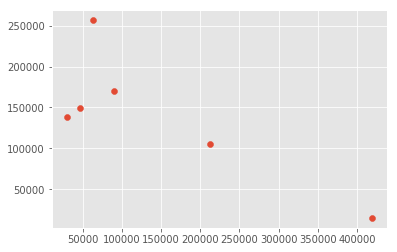

In [42]:
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(a, b)
plt.show ()


In [186]:
#pie chart for retirement accounts
#labels =list('Individual retirement arrangement payments, Taxable Social Security benefits, Self-employed (Keogh) retirement plans')
explode = [0, 0.1, 0]
Florida_total=Florida_cities.groupby(["Cities"]).sum().reset_index()
IRA=Florida_total["Individual retirement arrangement payments: Number of returns"].sum()
SS=Florida_total['Taxable Social Security benefits: Number or returns'].sum()
Keog = Florida_total["Self-employed (Keogh) retirement plans: Number of return"].sum()
Pensions=Florida_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA+SS+Keog+Pensions)
# Total =Total.convert_objects(convert_numeric=True) 
perc_IRA = (IRA/Total)
# perc_SS=(SS/Total)
# perc_Keog=(Keog/Total)
# percentage=[perc_IRA, perc_SS, perc_Keog]
# percentage=pd.DataFrame({"Values": [perc_IRA, perc_SS, perc_Keog]})
# fig1, ax1=plt.subplots()
# P=plt.pie(percentage["Values"], explode=explode, autopct='%1.1f%', shadow=True, startangle=90)
# plt.axis('equal')
# plt.show()



KeyError: 'Cities'

In [108]:
IRA

861990.0

In [101]:
SS

1412350

In [102]:
Keog

861990.0

In [104]:
Total

2585970.0

In [114]:
perc_IRA

0.27484033886740233

In [116]:
perc_SS

0.45031932226519533

In [117]:
perc_Keog

0.27484033886740233

In [118]:
percentage

[0.27484033886740233, 0.45031932226519533, 0.27484033886740233]

In [119]:
Values

[0.27484033886740233, 0.45031932226519533, 0.27484033886740233]

In [187]:
Total=(IRA+SS+Keog+Pensions)
#Total =Total.convert_objects(convert_numeric=True) 
perc_IRA = (IRA/Total)
perc_SS=(SS/Total)
perc_Keog=(Keog/Total)
perc_Pensions=(Pensions/Total)
percentage=[perc_IRA, perc_SS, perc_Keog, perc_Pensions]
explode = [0, 0.1, 0]

#plt.figure(figsize=(5,5))
#=pd.DataFrame({"Values": [perc_IRA, perc_SS, perc_Keog].values.tolist()
labels=["IRA", "SS", "Keog", "Pensions"]
#fares=Florida_tax_amount_p["Percentage of returns"].values.tolist()

explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns for Retired People")
plt.pie(percentage, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns.png")
plt.show()
#Values = [perc_IRA, perc_SS, perc_Keog]
#fig1, ax1=plt.subplots()
#plt.pie(percentage, explode, autopct='%1.1f%', shadow=True, startangle=90)
#plt.axis('equal')
#plt.show()

NameError: name 'Pensions' is not defined

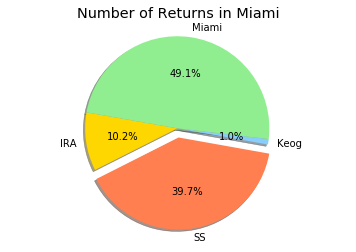

In [178]:

Miami_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Miami_total=Miami_sum.loc[Miami_sum["City"]=="Miami",:]
IRA_Miami=Miami_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Miami=Miami_total['Taxable Social Security benefits: Number or returns'].sum()
Keog_Miami=Miami_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Miami=Miami_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Miami+SS_Miami+Keog_Miami+Pensions_Miami)
perc_IRA_Miami = (IRA_Miami/Total)
perc_SS_Miami=(SS_Miami/Total)
perc_Keog_Miami=(Keog_Miami/Total)
perc_Pensions_Miami=(Pensions_Miami/Total)
percentage_Miami=[perc_IRA_Miami, perc_SS_Miami, perc_Keog_Miami, perc_Pensions_Miami]

labels=["IRA", "SS", "Keog", "Miami"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Miami")
plt.pie(percentage_Miami, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns for Miami.png")
plt.show()

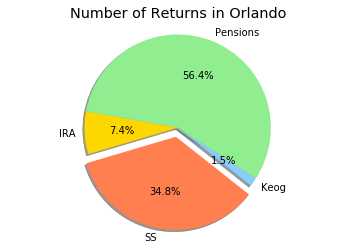

In [182]:
Orlando_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Orlando_total=Miami_sum.loc[Orlando_sum["City"]=="Orlando",:]
IRA_Orlando=Orlando_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Orlando=Orlando_total['Taxable Social Security benefits: Number or returns'].sum()
Keog_Orlando=Orlando_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Orlando=Orlando_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Orlando+SS_Orlando+Keog_Orlando+Pensions_Orlando)
perc_IRA_Orlando= (IRA_Orlando/Total)
perc_SS_Orlando=(SS_Orlando/Total)
perc_Keog_Orlando=(Keog_Miami/Total)
perc_Pensions_Orlando=(Pensions_Orlando/Total)
percentage_Orlando=[perc_IRA_Orlando, perc_SS_Orlando, perc_Keog_Orlando, perc_Pensions_Orlando]

labels=["IRA", "SS", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Orlando")
plt.pie(percentage_Orlando, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns for Orlando.png")
plt.show()

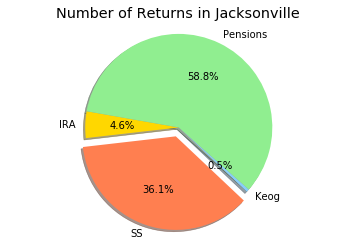

In [176]:
#Jacksonville_total=Florida_cities.loc[Florida_cities["City"]=="Jacksonville",:].sort_index()
Jacksonville_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Jacksonville_total=Jacksonville_sum.loc[Jacksonville_sum["City"]=="Jacksonville",:]
IRA_Jacksonville=Jacksonville_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Jacksonville=Jacksonville_total['Taxable Social Security benefits: Number or returns'].sum()
Keog_Jacksonville=Jacksonville_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Jacksonville=Jacksonville_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Jacksonville+SS_Jacksonville+Keog_Jacksonville+Pensions_Jacksonville)

perc_IRA_Jacksonville=(IRA_Jacksonville/Total)
perc_SS_Jacksonville=(SS_Jacksonville/Total)
perc_Keog_Jacksonville=(Keog_Jacksonville/Total)
perc_Pensions_Jacksonville=(Pensions_Jacksonville/Total)
percentage_Jacksonville=[perc_IRA_Jacksonville, perc_SS_Jacksonville, perc_Keog_Jacksonville, perc_Pensions_Jacksonville]


labels=["IRA", "SS", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Jacksonville")
plt.pie(percentage_Jacksonville, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns for Jacksonville.png")
plt.show()

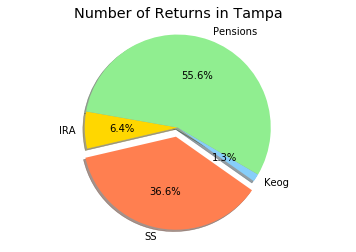

In [162]:
Tampa_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Tampa_total=Tampa_sum.loc[Tampa_sum["City"]=="Tampa",:]
IRA_Tampa=Tampa_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Tampa=Tampa_total['Taxable Social Security benefits: Number or returns'].sum()
Keog_Tampa=Tampa_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Tampa=Tampa_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Tampa+SS_Tampa+Keog_Tampa+Pensions_Tampa)

perc_IRA_Tampa=(IRA_Tampa/Total)
perc_SS_Tampa=(SS_Tampa/Total)
perc_Keog_Tampa=(Keog_Tampa/Total)
perc_Pensions_Tampa=(Pensions_Tampa/Total)
percentage_Tampa=[perc_IRA_Tampa, perc_SS_Tampa, perc_Keog_Tampa, perc_Pensions_Tampa]


labels=["IRA", "SS", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Tampa")
plt.pie(percentage_Tampa, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns for Tampa.png")
plt.show()

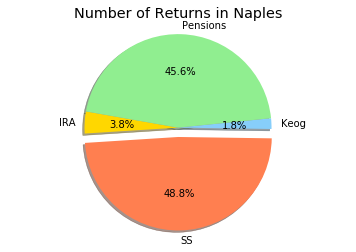

In [179]:
Naples_sum=Florida_cities.groupby(["City"]).sum().reset_index()
Naples_total=Naples_sum.loc[Tampa_sum["City"]=="Naples",:]
IRA_Naples=Naples_total["Individual retirement arrangement payments: Number of returns"].sum()
SS_Naples=Naples_total['Taxable Social Security benefits: Number or returns'].sum()
Keog_Naples=Naples_total["Self-employed (Keogh) retirement plans: Number of returns"].sum()
Pensions_Naples=Naples_total["Pensions and annuities in AGI: Number of returns"].sum()
Total=(IRA_Naples+SS_Naples+Keog_Naples+Pensions_Naples)

perc_IRA_Naples=(IRA_Naples/Total)
perc_SS_Naples=(SS_Naples/Total)
perc_Keog_Naples=(Keog_Naples/Total)
perc_Pensions_Naples=(Pensions_Naples/Total)
percentage_Naples=[perc_IRA_Naples, perc_SS_Naples, perc_Keog_Naples, perc_Pensions_Naples]


labels=["IRA", "SS", "Keog", "Pensions"]
explode=(0, 0.1, 0, 0)
colors=["gold", "coral", "lightskyblue", "lightgreen"]

plt.title("Number of Returns in Naples")
plt.pie(percentage_Naples, explode=explode, labels=labels, \
        colors=colors, radius=1, autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis('equal')
plt.savefig("Retirement Number of Returns for Naples.png")
plt.show()

In [7]:
Miami_total=Florida_cities.loc[Florida_cities["City"]=="Miami",:].sort_index()
Miami_total

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
1374,Miami,Under $25000,418500.0,267380.0,48950.0,96550.0,295380.0,625310.0,202240.0,6150,...,247200,258130,0,0,0,0,65450,59288,335280,866524
1375,Miami,$25000 to $50000,212010.0,106680.0,44680.0,55510.0,146860.0,384940.0,129190.0,2070,...,176230,430134,0,0,0,0,27500,57507,182560,552279
1376,Miami,"$50,000 to $75,000",90440.0,39660.0,28350.0,19490.0,62350.0,174570.0,55880.0,30,...,87400,490696,0,0,0,0,17860,54548,71150,239862
1377,Miami,"$75,000 to $100,000",46890.0,15890.0,22010.0,7700.0,32440.0,101760.0,32920.0,0,...,46430,443239,0,0,0,0,11570,46681,34270,136014
1378,Miami,"$100,000 to $200,000",63830.0,13890.0,43260.0,5980.0,44770.0,163800.0,56800.0,0,...,63520,1221475,840,276,120,77,21750,136048,39560,197598
1379,Miami,Over $200000,30320.0,4520.0,23640.0,1250.0,24700.0,84490.0,30520.0,0,...,30270,4278121,15050,34858,16890,83920,15370,523474,10370,228564


In [12]:
Miami_total.columns.values

array(['City', 'Size of adjusted gross income', 'Number of returns',
       'Number of single returns', 'Number of joint returns',
       'Number of head of household returns',
       "Number with paid preparer's signature", 'Number of exemptions',
       'Number of dependents',
       'Total Number of volunteer prepared returns',
       'Number of volunteer income tax assistance prepared returns',
       'Number of tax counseling for the elderly prepared returns',
       'Number of volunteer prepared returns with Earned Income Credit',
       'Number of refund anticipation loan returns',
       'Number of refund anticipation check returns',
       'Number of elderly returns', 'Adjusted gross income (AGI)',
       'Total income: Number of returns', 'Total income: Amount',
       'Salaries and wages in AGI: Number of returns',
       'Salaries and wages in AGI: Amount',
       'Taxable interest: Number of returns', 'Taxable interest: Amount',
       'Ordinary dividends: Number of return

In [18]:
#Top 5 cities for under $25000 total returns.
Lower_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>100000) & (Florida_cities["Size of adjusted gross income"]=="Under $25000"),:]

Lower_bracket

,City,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
378,Jacksonville,Under $25000,160460.0,101290.0,15380.0,40700.0,64860.0,246290.0,88030.0,6580,...,80120,75216,0,0,0,0,12440,10675,141830,352045
1170,Orlando,Under $25000,215530.0,139070.0,21420.0,51880.0,111700.0,328410.0,116770.0,3190,...,110920,106510,0,0,0,0,18660,16946,188750,491770
1374,Miami,Under $25000,418500.0,267380.0,48950.0,96550.0,295380.0,625310.0,202240.0,6150,...,247200,258130,0,0,0,0,65450,59288,335280,866524
1392,Fort Lauderdale,Under $25000,162930.0,108500.0,16790.0,35030.0,111560.0,235410.0,76510.0,2660,...,87460,88128,0,0,0,0,20420,19485,132100,336029
1656,Tampa,Under $25000,150780.0,97700.0,14460.0,36420.0,67470.0,227510.0,79240.0,2710,...,77160,75672,0,0,0,0,14690,13683,129790,320303


In [21]:
Florida_cities["Size of adjusted gross income"].values

array(['Under $25000', '$25000 to $50000', '$50,000 to $75,000', ...,
       '$75,000 to $100,000', '$100,000 to $200,000', 'Over $200000'],
      dtype=object)

In [43]:
# Top 5 returns in the $25000 to $100,000 income bracket.

Middle_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under $25000") & \
(Florida_cities["Size of adjusted gross income"]!="$100,000 to $200,000") & \
(Florida_cities["Size of adjusted gross income"]!="Over $200000"),:]

Middle_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Middle_bracket

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,97640.0,52420.0,18550.0,23630.0,62610.0,171550.0,55880.0,1040,910,...,81500,213519,0,0,0,0,13910,26137,82120,239803
1,Jacksonville,112330.0,57630.0,23410.0,26950.0,41560.0,205360.0,70000.0,4220,2620,...,92540,244146,0,0,0,0,14980,22698,96470,261537
2,Miami,302450.0,146340.0,73030.0,75000.0,209210.0,559510.0,185070.0,2100,1880,...,263630,920830,0,0,0,0,45360,112055,253710,792141
3,Orlando,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,560,...,100840,262053,0,0,0,0,15580,26694,107110,306814
4,Tampa,93790.0,51390.0,17080.0,22550.0,36860.0,166030.0,55600.0,1440,790,...,78170,211759,0,0,0,0,12780,21774,80130,214439


In [48]:
# Top 5 returns for over $100,000 income bracket.

Upper_bracket=Florida_cities.loc[ \
(Florida_cities["Number of returns"]>75000) & (Florida_cities["Size of adjusted gross income"]!="Under $25000") & \
(Florida_cities["Size of adjusted gross income"]!="$25000 to $50000") & \
(Florida_cities["Size of adjusted gross income"]!="$50,000 to $75,000") & \
(Florida_cities["Size of adjusted gross income"]!="$75,000 to $100,000"),:]

Upper_bracket=Middle_bracket.groupby(["City"]).sum().reset_index()

Upper_bracket

,City,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Total Number of volunteer prepared returns,Number of volunteer income tax assistance prepared returns,...,Total tax liability: Number of returns,Total tax liability: Amount,Total additional Medicare tax: Number of returns,Total additional Medicare tax: Amount,Net investment income tax: Number of returns,Net investment income tax: Amount,Tax due at time of filing: Number of returns,Tax due at time of filing: Amount,Overpayments refunded: Number of returns,Overpayments refunded: Amount
0,Fort Lauderdale,97640.0,52420.0,18550.0,23630.0,62610.0,171550.0,55880.0,1040,910,...,81500,213519,0,0,0,0,13910,26137,82120,239803
1,Jacksonville,112330.0,57630.0,23410.0,26950.0,41560.0,205360.0,70000.0,4220,2620,...,92540,244146,0,0,0,0,14980,22698,96470,261537
2,Miami,302450.0,146340.0,73030.0,75000.0,209210.0,559510.0,185070.0,2100,1880,...,263630,920830,0,0,0,0,45360,112055,253710,792141
3,Orlando,123530.0,64060.0,25630.0,30010.0,58470.0,229090.0,80470.0,1350,560,...,100840,262053,0,0,0,0,15580,26694,107110,306814
4,Tampa,93790.0,51390.0,17080.0,22550.0,36860.0,166030.0,55600.0,1440,790,...,78170,211759,0,0,0,0,12780,21774,80130,214439
